# Del 1: Pandas Time Series - Vaje

## Vaja 1

###  Import the necessary libraries

In [16]:
import pandas as pd

### Import the dataset from URL and assign it to a variable apple

In [17]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

In [18]:
var_apple=pd.read_csv(url)
var_apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Check out the type of the columns

In [19]:
var_apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Transform the Date column as a datetime type

In [20]:
var_apple['Date']=pd.to_datetime(var_apple['Date'])
var_apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Set the date as the index

In [21]:
var_apple.set_index('Date', inplace=True)
var_apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Is there any duplicate dates?

In [24]:
var_apple[var_apple.duplicated(keep=False)]
#ni zadetkov ni duplikatov. Uporabljeno->DataFrame.duplicated(self, subset=None, keep='first')[source]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,


### Sort the index to be the first entry the oldest date

In [25]:
var_apple.sort_values(by=['Date'], inplace=True, ascending=True)
var_apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Get the last business day of each month

In [27]:
var_apple.groupby(var_apple.index.strftime('%Y-%m')).tail(1).head()
#group by indeks in strftime
#po indeksu, ki je datum f-ja strftime omogoča prepoznavo in filtriranje Y,M
#tail vrne zadnji dan

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-30,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-27,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### What is the difference in days between the first day and the oldest

In [29]:
raz = var_apple.index.max()-var_apple.index.min()
#razlika med ind. ki stadatuma vrne št. dni
print(raz)

12261 days 00:00:00


### How many months in the data we have?

In [38]:
mesci=var_apple.index.max().to_period('M')-var_apple.index.min().to_period('M')
mesci
#se mi zdi bolj prav kot če bi izračunal iz št. dni. dobiš cca 402,8... sepravi 403 mescev bi morali biti prav


<403 * MonthEnds>

### Plot the 'Adj Close' value

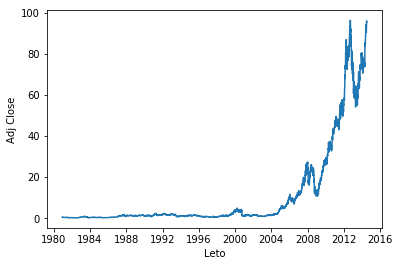

In [41]:
import matplotlib.pyplot as plt
#spodaj napisano zarari težav z opozorili.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(var_apple['Adj Close'])

plt.xlabel('Leto')
plt.ylabel('Adj Close')

plt.show()